In [8]:
##### ATOC7500 - jackknife_example - Lecture #2/Lecture #4
##### Originally coded by Prof. Barnes (CSU), updated/adapted for Jupyter Notebook/Python3 by Prof. Kay (CU)
##### Last updated: August 25, 2020
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import scipy.io as sio
import pandas as pd  # library for data analysis for text files (everything but netcdf files)
%matplotlib inline

In [9]:
import os #change directory to where there is data, not local GitHub repo
os.chdir('/Users/chwy8767/Google Drive/ATOC_7500_Data_Analysis/2_Regression_corr/L4')

In [10]:
## load the data = time series of the monthly Northern Annual Mode Index
DATA = sio.loadmat('nao_timeseries.mat')
X = DATA['NAO'][:,0] # grab January data only
TIME_NAO = DATA['TIME_NAO'][:,0]

slope = 0.014; y-intercept = -28.38


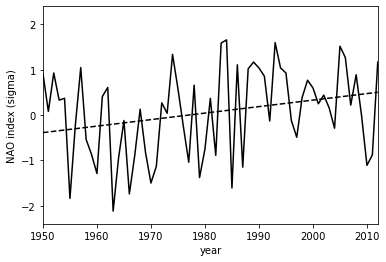

In [19]:
## plot the data including the slope of a best-fit line through the data
# Look at your data :)!
plt.plot(TIME_NAO,X,color = 'black', linewidth = 1.5)
pfull = np.polyfit(TIME_NAO,X,1)
plt.plot(TIME_NAO,TIME_NAO*pfull[0]+pfull[1],'--',color = 'black', linewidth = 1.5)
plt.xlabel('year');
plt.ylabel('NAO index (sigma)');
plt.ylim(-2.4,2.4);
plt.xlim(min(TIME_NAO), max(TIME_NAO));

slope = pfull[0]
yint = pfull[1]

print('slope = ' + str(np.round(slope,3)) + '; y-intercept = ' + str(np.round(yint,2)))

In [20]:
X #January Data

array([ 0.92,  0.08,  0.93,  0.33,  0.37, -1.84, -0.22,  1.05, -0.54,
       -0.87, -1.29,  0.41,  0.61, -2.12, -0.95, -0.12, -1.74, -0.89,
        0.13, -0.83, -1.5 , -1.13,  0.27,  0.04,  1.34,  0.58, -0.25,
       -1.04,  0.66, -1.38, -0.75,  0.37, -0.89,  1.59,  1.66, -1.61,
        1.11, -1.15,  1.02,  1.17,  1.04,  0.86, -0.13,  1.6 ,  1.04,
        0.93, -0.12, -0.49,  0.39,  0.77,  0.6 ,  0.25,  0.44,  0.16,
       -0.29,  1.52,  1.27,  0.22,  0.89, -0.01, -1.11, -0.88,  1.17])

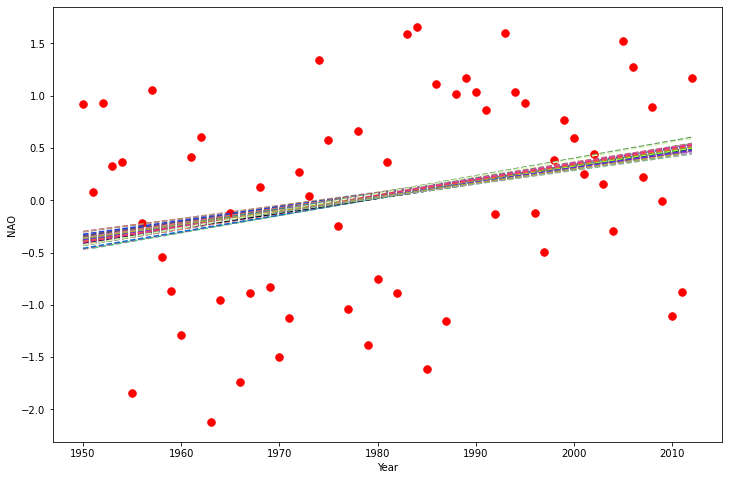

In [36]:
## How certain are we of these slope and y-intercept values.  
# Let's apply the Jackknife to see.  
# Jackknife = Systematically remove one value from your sample, calculate the statistic. Repeat for all values.

M = np.empty([len(X),2])
plt.figure(figsize=[12,8])

for j, val in enumerate(X):
    X2 = X
    X2 = np.delete(X2,j)
    T2 = TIME_NAO
    T2 = np.delete(T2,j)
    pfull = np.polyfit(T2,X2,1)
    
    M[j,0] = pfull[0]
    M[j,1] = pfull[1]
    
    plt.plot(TIME_NAO[j],val,'.',color = 'red', markersize = 15)
    plt.plot(T2,T2*pfull[0] + pfull[1],'--', color = np.random.random_sample(size = 3))
    plt.xlabel('Year')
    plt.ylabel('NAO')

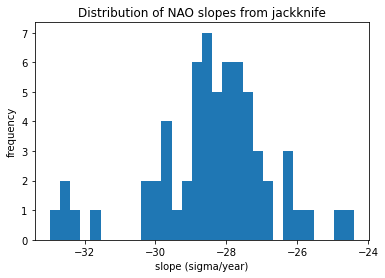

In [50]:
## Plot the distribution of slopes from Jackknife

# xint = np.arange(.01,.02,.00025)
# y, bin_edges = np.histogram(M,xint)
# plt.plot(bin_edges[:-1],y/float(len(M)));
plt.hist(M[:,1],30);
plt.xlabel('slope (sigma/year)');
plt.ylabel('frequency');
plt.title('Distribution of NAO slopes from jackknife');

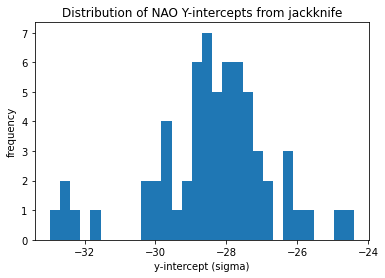

In [49]:
## Plot the distribution of y-intercepts from Jackknife

# xint = np.arange(-36.,-22.,.5);
# y, bin_edges = np.histogram(M,xint);
# plt.plot(bin_edges[:-1],y/float(len(M)));
plt.hist(M[:,1],30)
plt.xlabel('y-intercept (sigma)');
plt.ylabel('frequency');
plt.title('Distribution of NAO Y-intercepts from jackknife');